In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random, math, copy
from faker import Faker
from sympy.utilities.iterables import multiset_permutations
from operator import itemgetter


#Styles for plot
%matplotlib inline
plt.style.use('seaborn-notebook')

#constants to generate data     
DOTS_N  = 7
DIST_RANGE = 8
fr_fr_faker = Faker('fr_FR')  # set French facker

#Generator
dots_pure = [random.sample(range(DIST_RANGE),2) for x in range(DOTS_N)]
listofcitynames = [fr_fr_faker.city() for x in range(DOTS_N)]

#Build distance matrix and Data Frame (for test, are not used anywhere for now)
array_dots = np.array(dots_pure)
M=[[math.sqrt(sum([(array_dots[i][d]-array_dots[j][d])**2 for d in[0,1]]))for j in range(DOTS_N)]for i in range(DOTS_N)]
df = pd.DataFrame(np.matrix(M), columns=listofcitynames, index=listofcitynames)
#print(df)

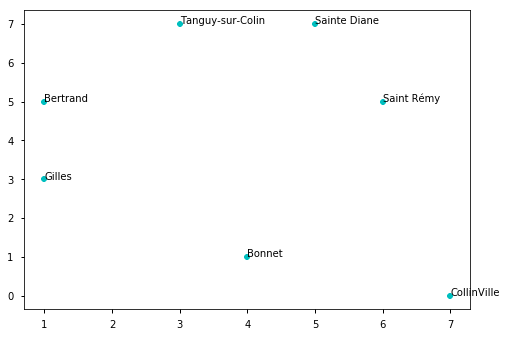

In [334]:
#Plot dots with labels
plt.plot([dots_pure[i][0]for i in range(DOTS_N)], [dots_pure[i][1]for i in range(DOTS_N)],'c8')
for i in range(DOTS_N):
    plt.annotate(
        listofcitynames[i],
        xy=(dots_pure[i][0], dots_pure[i][1]))
plt.show()  

In [335]:
#Combine city names and dots
dots =[[listofcitynames[i],dots_pure[i]] for i in range(DOTS_N)]

#Generate all possible unique permutations
print("Number of possible permutations = ", math.factorial(DOTS_N))
possibleWays=list(multiset_permutations(dots))

#Calculate distances, combine appropriate pathes
ways_distance = [sum([math.sqrt(sum([(possibleWays[j][i+1][1][d]-possibleWays[j][i][1][d])**2 for d in[0,1]]))for i in range(DOTS_N-1)]) + sum([math.sqrt(sum([(possibleWays[j][DOTS_N-1][1][d]-possibleWays[j][0][1][d])**2 for d in[0,1]]))]) for j in range(len(possibleWays)-1)]              
ways_path = [[possibleWays[j][i][0] for i in range(DOTS_N)]for j in range(len(possibleWays)-1)]
output =[[ways_distance[i],ways_path[i]] for i in range(len(possibleWays)-1)]

#Get minimum distance and path
min_output = sorted(output, key=itemgetter(0))[0]
print('Min Distance = ', min_output[0])
print('Min Path = ', min_output[1])
#print('Middle distance = ', sorted(output, key=itemgetter(0))[5038])
#print(sorted(output, key=itemgetter(0)))


Number of possible permutations =  5040
Min Distance =  20.93134355147113
Min Path =  ['Bonnet', 'CollinVille', 'Saint Rémy', 'Sainte Diane', 'Tanguy-sur-Colin', 'Bertrand', 'Gilles']
